# Calibration: Liu et al. (2005)
This notebook tests the outputs of VESIcal for the Liu et al. (2005) model.
- This notebook uses the Excel spreadsheet entitled: "S4_Testing_Liu_et_al_2005.xlsx"
- Test 1 compares the experimental pressures in the H$_2$O-only experiments in Tables 2a and 2b from Liu et al. (2005) to the saturation pressures obtained from VESIcal for the "LiuWater" model. 
- Test 2 uses a synthetic array of inputs with increasing H$_2$O contents to compare calculated saturation pressures using "LiuWater" to those shown in Fig.5 of Liu et al. (2005) for three different temperatures. 
- Test 3 uses a synthetic array of inputs with increasing CO$_2$ contents using "LiuCarbon" to recreate Fig. 7 of Liu et al. (2005).
- Test 4 produces isobars at varying pressures and temperatures to recreate Fig. 6 of Liu et al. (2005). 

In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["legend.fontsize"]= 14

# Test 1 - Comparing experimental pressures to those calculated from VESIcal

In [3]:
# This loads the calibration dataset of Liu et al. 2005, and calculates saturation pressures based on the major elements, temperature, and water contents.
myfile= v.BatchFile('S4_Testing_Liu_et_al_2005.xlsx', sheet_name='Test 1')
data = myfile.get_data()
satPs_wtemps_Liu_Water=myfile.calculate_saturation_pressure(temperature="Temp", model='LiuWater')

Text(0.5, 1, 'Comparing P$_{Sat}$ from VESIcal to experimental pressures')

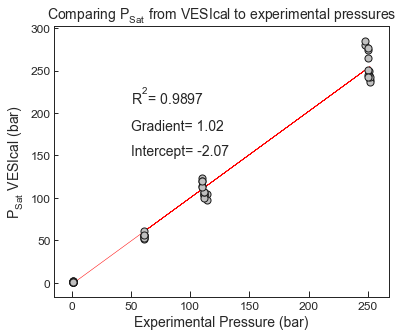

In [4]:
# This calculating a linear regression, and plots experimental pressures vs. saturation pressures (all data)
X_Test1=satPs_wtemps_Liu_Water['Press'] 
Y_Test1=satPs_wtemps_Liu_Water['SaturationP_bars_VESIcal']
mask_Test1 = (X_Test1>-1) & (Y_Test1>-1)  # This gets rid of Nans
X_Test1noNan=X_Test1[mask_Test1].values.reshape(-1, 1)
Y_Test1noNan=Y_Test1[mask_Test1].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test1noNan,Y_Test1noNan)
Y_pred_Test1=lr.predict(X_Test1noNan)


fig, ax1 = plt.subplots(figsize = (6,5)) # adjust dimensions of figure here
ax1.set_xlabel('Experimental Pressure (bar)', fontsize=14)
ax1.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)

ax1.plot(X_Test1noNan,Y_pred_Test1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(satPs_wtemps_Liu_Water['Press'], satPs_wtemps_Liu_Water['SaturationP_bars_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 4)) 
ax1.text(50, 150, I, fontsize=14)
ax1.text(50, 180, G, fontsize=14)
ax1.text(50, 210, R, fontsize=14)
fig.savefig('Liu_Test1.png', transparent=True)

ax1.set_title('Comparing P$_{Sat}$ from VESIcal to experimental pressures',
        fontsize=14)

# Test 2 -Recreating their Fig. 5 using a synthetic array of inputs
- The LiuWater model was used to calculate saturation pressures for a synthetic array of inputs with varying H$_2$O contents evluated at 3 temperatures (700, 800 and 1200°C). The calculated pressures and input water contents were overlain on Fig. 5 of Liu et al. (2005) in Adobe Illustrator (pasted below). 

In [5]:
# This loads the calibration dataset of Liu et al. 2005, and calculates saturation pressures based on the major element contents, temperature, and water content.
myfile_syn= v.BatchFile('S4_Testing_Liu_et_al_2005.xlsx', sheet_name='Test 2')
data_syn= myfile_syn.get_data()

/opt/anaconda3/lib/python3.7/site-packages/VESIcal/models/liu.py:87: RuntimeWarning: invalid value encountered in double_scalars
  0.0012439*Pw**(1.5) + PCO2*(-1.084*10**(-4)*Pw**(0.5) - 1.362*10**(-5)*Pw))


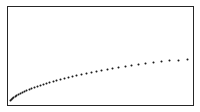

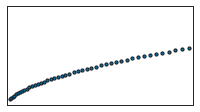

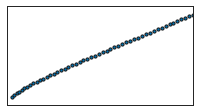

In [6]:

satPs_wtemps_Liu_Water_syn=myfile_syn.calculate_saturation_pressure(temperature=700, model='LiuWater') 
def cm2inch(value):
    return value/2.54
fig, ax1 = plt.subplots(figsize =(cm2inch(7*1.21), cm2inch(4*1.15))) # adjust dimensions of figure here
#fig = plt.figure(figsize=(cm2inch(12.8), cm2inch(9.6)))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.scatter(0.1*satPs_wtemps_Liu_Water_syn['SaturationP_bars_VESIcal'], satPs_wtemps_Liu_Water_syn['H2O'], s=1, edgecolor='k')
plt.xlim([0, 500])
plt.ylim([0, 20])
#plt.xlabel('H2O content')
#plt.ylabel('Saturation Pressure (VESIcal) Liu')
plt.yticks()

fig.savefig('700Ccurves.svg', transparent=True)
#
satPs_wtemps_Liu_Water_syn_800=myfile_syn.calculate_saturation_pressure(temperature=800, model='LiuWater')
def cm2inch(value):
    return value/2.54
fig, ax1 = plt.subplots(figsize =(cm2inch(7*1.21), cm2inch(4*1.15))) # adjust dimensions of figure here
#fig = plt.figure(figsize=(cm2inch(12.8), cm2inch(9.6)))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.scatter(0.1*satPs_wtemps_Liu_Water_syn_800['SaturationP_bars_VESIcal'], satPs_wtemps_Liu_Water_syn_800['H2O'], s=10, edgecolor='k')
plt.xlim([0, 500])
plt.ylim([0, 17])
#plt.xlabel('H2O content')
#plt.ylabel('Saturation Pressure (VESIcal) Liu')
plt.yticks()

fig.savefig('800Ccurves.svg', transparent=True)
#####################################################
satPs_wtemps_Liu_Water_syn_1200=myfile_syn.calculate_saturation_pressure(temperature=1200, model='LiuWater')
def cm2inch(value):
    return value/2.54
fig, ax1 = plt.subplots(figsize =(cm2inch(7*1.21), cm2inch(4*1.15))) # adjust dimensions of figure here
#fig = plt.figure(figsize=(cm2inch(12.8), cm2inch(9.6)))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.scatter(0.1*satPs_wtemps_Liu_Water_syn_1200['SaturationP_bars_VESIcal'], satPs_wtemps_Liu_Water_syn_1200['H2O'], s=10, edgecolor='k')
plt.xlim([0, 500])
plt.ylim([0, 12])
#plt.xlabel('H2O content')
#plt.ylabel('Saturation Pressure (VESIcal) Liu')
plt.yticks()

fig.savefig('1200Ccurves.svg', transparent=True)

![Description](Testing_Liu_img1.png)


# Test 3 - Recreating their Fig. 7  
- The black line shown on Fig. 7 of Liu et al. (2005) was calculated using their Equation 2b at 1050°C. We generate a synthetic anhydrous dataset with varying CO$_2$ contents, and calculate saturation pressures using the LiuCarbon model. These fall perfectly along the published line. 

In [7]:
myfile_CO2= v.BatchFile('S4_Testing_Liu_et_al_2005.xlsx', sheet_name='Test 3')
data_CO2 = myfile_CO2.get_data()

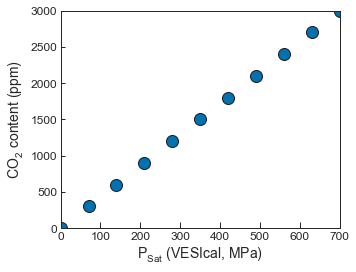

In [8]:
myfile_CO2= v.BatchFile('S4_Testing_Liu_et_al_2005.xlsx', sheet_name='Test 3')
satPs_wtemps_Liu_CO2=myfile_CO2.calculate_saturation_pressure(temperature=1050, model='LiuCarbon')

fig, ax1 = plt.subplots(figsize = (5,4)) # adjust dimensions of figure here
plt.scatter(0.1*satPs_wtemps_Liu_CO2['SaturationP_bars_VESIcal'], 10000*satPs_wtemps_Liu_CO2['CO2'], edgecolor='k')
plt.ylim([0, 3000])
plt.xlim([0, 700])
plt.ylabel('CO$_2$ content (ppm)')
plt.xlabel('P$_{Sat}$ (VESIcal, MPa)')
plt.yticks()
fig.savefig('1050CO2curves.svg', transparent=True)

![Description](Testing_Liu_img2.png)

# Test 4  - Recreating published isobars
- The test calculates isobars for varying tempreatures and pressures and overlays them on Fig. 6 from Liu et al. (2005) in adobe illustrator (pasted below)

In [9]:
"""To get composition from a specific sample in the input data:"""
SampleName = 'Sample1'
bulk_comp = myfile.get_sample_composition(SampleName, asSampleClass=True)

"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 1000

"""Define a list of pressures in bars:"""
pressures = [750, 2000, 5000]

isobars_75_850, isopleths_75_850 = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Liu',
                                            temperature=850,
                                            pressure_list=[750],
                                            isopleth_list=[0.01, 0.1, 0.2, 0.25, 0.3,  0.5, 0.6,  0.75, 1],
                                            print_status=True).result
isobars_2000_1100, isopleths_2000_1100 = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Liu',
                                            temperature=1100,
                                            pressure_list=[2000],
                                            isopleth_list=[0.01, 0.1, 0.2, 0.25, 0.3,  0.5, 0.6,  0.75, 1],
                                            print_status=True).result
isobars_5000_1100, isopleths_5000_1100 = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Liu',
                                            temperature=1100,
                                            pressure_list=[5000],
                                            isopleth_list=[0.01, 0.1, 0.2, 0.25, 0.3,  0.5, 0.6,  0.75, 1],
                                            print_status=True).result

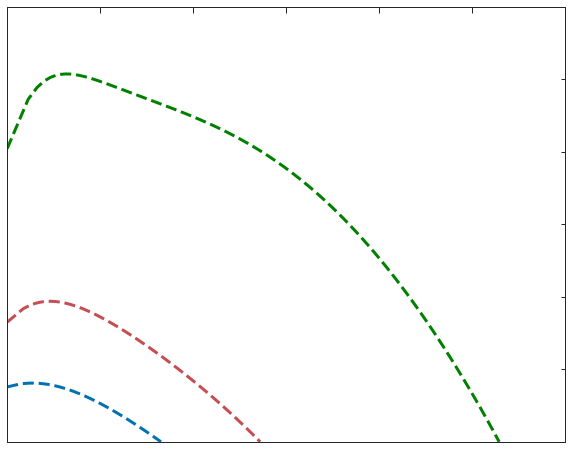

In [10]:
fig, ax1 = plt.subplots(figsize = (10,8))

plt.plot(isobars_75_850["H2O_liq"], 10000*isobars_75_850["CO2_liq"], linestyle='dashed')
plt.plot(isobars_2000_1100["H2O_liq"], 10000*isobars_2000_1100["CO2_liq"], linestyle='dashed', color='r')
plt.plot(0.98*isobars_5000_1100["H2O_liq"], 0.98*10000*isobars_5000_1100["CO2_liq"], color='green', linestyle='dashed') # Corrected for the factor of 0.98 (in figure caption

plt.xlim([0, 12])
plt.ylim([0, 3000])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False, 
    right=True,# ticks along the bottom edge are off
    top=True, # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
fig.savefig('1050_Isobars.svg', transparent=True)

![Description](Testing_Liu_img3.png)
